In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [220]:
#Importing dataset
Iris = pd.read_csv('../input/iris/Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [221]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [222]:
# determining all iris species included
Iris['Species'].value_counts(dropna=False)

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [223]:
# creating dummmy variable for the species type
Species = pd.get_dummies(Iris['Species'])

In [224]:
#Selecting required data
X = Iris.iloc[:, 1:5].values
y = Species.values

In [225]:
#Splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [226]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [227]:
#Importing keras packages
from keras.models import Sequential
from keras.layers import Dense

In [228]:
#Initializing Artificial Neural Network (ANN)
classifier = Sequential()

In [229]:
#Adding input layer and first hidden layer
classifier.add(Dense(activation="relu", kernel_initializer="uniform", input_dim=4, units=3))

In [230]:
#Adding second hidden layer
classifier.add(Dense(activation="relu", kernel_initializer="uniform", units=3))

In [231]:
#Adding output layer
classifier.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=3))

In [232]:
#Compiling ANN
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [233]:
#Fitting ANN to training set
history = classifier.fit(X_train, y_train, batch_size = 25, epochs = 500, validation_split=0.25, verbose=0)


In [234]:
#Predicting test results
y_pred = classifier.predict(X_test)

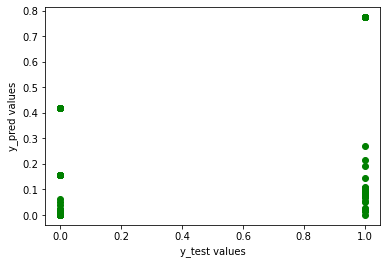

In [235]:
plt.scatter(x=y_test,y=y_pred, color= 'green')
plt.xlabel('y_test values')
plt.ylabel('y_pred values')
plt.show()

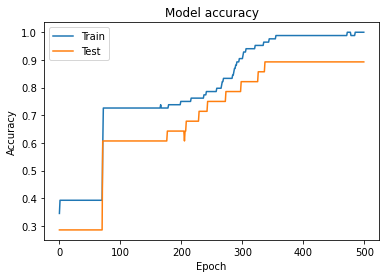

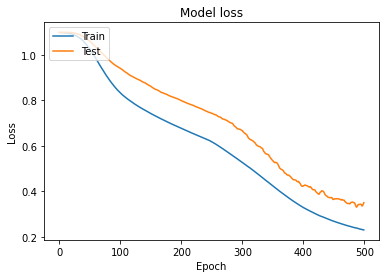

In [236]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Note:

This model was built by following method given for ANNs in this course:  [Deep Learning A-Z™: Hands-On Artificial Neural Networks](http://)
